In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import scipy.stats as stats
import math

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15.0, 8.0)

In [731]:
rates = pd.read_csv('rates_clean.csv', parse_dates=['Dates'])

In [889]:
history_end_date = '2011-01-13' # задаем дату конца истории (включая последний день)

today_date = '2011-01-13' # дата первого построения VaR

future_start_date = '2011-01-14' # задаем дату начала будущего

In [733]:
rates.head()

,Dates,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,...,13.50,14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50,18.00
0,2009-01-13,11.18,11.53,11.670,11.81,11.785,11.76,11.7000,11.640,11.5800,...,10.672,10.628,10.584,10.54,10.54,10.54,10.54,10.54,10.54,10.54
1,2009-01-11,10.39,10.83,11.065,11.30,11.285,11.27,11.1575,11.045,10.9325,...,9.565,9.520,9.475,9.43,9.43,9.43,9.43,9.43,9.43,9.43
2,2009-01-16,10.42,10.67,10.795,10.92,10.930,10.94,10.9100,10.880,10.8500,...,10.417,10.398,10.379,10.36,10.36,10.36,10.36,10.36,10.36,10.36
3,2009-01-12,11.15,11.53,11.600,11.67,11.535,11.40,11.2600,11.120,10.9800,...,9.791,9.754,9.717,9.68,9.68,9.68,9.68,9.68,9.68,9.68
4,2009-01-22,11.26,11.42,11.480,11.54,11.540,11.54,11.5400,11.540,11.5400,...,11.510,11.500,11.490,11.48,11.48,11.48,11.48,11.48,11.48,11.48


In [734]:
rates = rates.sort_values(by=['Dates']) # сортируем ставки по датам

In [735]:
rates = rates.set_index('Dates') # делаем даты индексами

In [736]:
rates.head()

,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,...,13.50,14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50,18.00
Dates,,,,,,,,,,,,,,,,,,,,,
2009-01-11,10.39,10.83,11.065,11.30,11.285,11.27,11.1575,11.045,10.9325,10.82,...,9.565,9.520,9.475,9.43,9.43,9.43,9.43,9.43,9.43,9.43
2009-01-12,11.15,11.53,11.600,11.67,11.535,11.40,11.2600,11.120,10.9800,10.84,...,9.791,9.754,9.717,9.68,9.68,9.68,9.68,9.68,9.68,9.68
2009-01-13,11.18,11.53,11.670,11.81,11.785,11.76,11.7000,11.640,11.5800,11.52,...,10.672,10.628,10.584,10.54,10.54,10.54,10.54,10.54,10.54,10.54
2009-01-14,11.57,11.89,12.070,12.25,12.260,12.27,12.2175,12.165,12.1125,12.06,...,11.319,11.286,11.253,11.22,11.22,11.22,11.22,11.22,11.22,11.22
2009-01-15,10.79,10.99,11.095,11.20,11.205,11.21,11.1800,11.150,11.1200,11.09,...,10.701,10.684,10.667,10.65,10.65,10.65,10.65,10.65,10.65,10.65


In [737]:
rates.tail()

,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,...,13.50,14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50,18.00
Dates,,,,,,,,,,,,,,,,,,,,,
2011-12-30,5.97,6.47,6.845,7.22,7.460,7.70,7.8200,7.940,8.0600,8.18,...,8.464,8.466,8.468,8.47,8.47,8.47,8.47,8.47,8.47,8.47
2012-01-03,6.00,6.48,6.860,7.24,7.490,7.74,7.8750,8.010,8.1450,8.28,...,8.573,8.572,8.571,8.57,8.57,8.57,8.57,8.57,8.57,8.57
2012-01-04,6.00,6.46,6.825,7.19,7.445,7.70,7.8375,7.975,8.1125,8.25,...,8.570,8.570,8.570,8.57,8.57,8.57,8.57,8.57,8.57,8.57
2012-01-05,6.02,6.48,6.855,7.23,7.485,7.74,7.8775,8.015,8.1525,8.29,...,8.603,8.602,8.601,8.60,8.60,8.60,8.60,8.60,8.60,8.60
2012-01-06,6.03,6.49,6.860,7.23,7.485,7.74,7.8775,8.015,8.1525,8.29,...,8.603,8.602,8.601,8.60,8.60,8.60,8.60,8.60,8.60,8.60


In [739]:
rates_history = rates[rates.index <= history_end_date] # выделяем в отдельный массим исторические ставки...
rates_future.head()

,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,...,13.50,14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50,18.00
Dates,,,,,,,,,,,,,,,,,,,,,
2011-01-13,4.48,5.24,5.760,6.28,6.595,6.91,7.0550,7.200,7.3450,7.49,...,7.884,7.896,7.908,7.92,7.92,7.92,7.92,7.92,7.92,7.92
2011-01-14,4.58,5.41,5.950,6.49,6.790,7.09,7.2150,7.340,7.4650,7.59,...,7.890,7.900,7.910,7.92,7.92,7.92,7.92,7.92,7.92,7.92
2011-01-17,4.40,5.22,5.775,6.33,6.650,6.97,7.1150,7.260,7.4050,7.55,...,7.900,7.910,7.920,7.93,7.93,7.93,7.93,7.93,7.93,7.93
2011-01-18,4.36,5.16,5.705,6.25,6.570,6.89,7.0375,7.185,7.3325,7.48,...,7.894,7.906,7.918,7.93,7.93,7.93,7.93,7.93,7.93,7.93
2011-01-19,4.36,5.15,5.690,6.23,6.555,6.88,7.0325,7.185,7.3375,7.49,...,7.917,7.928,7.939,7.95,7.95,7.95,7.95,7.95,7.95,7.95


In [890]:
rates_today_future = rates[rates.index >= today_date] #... и в отдельный блок ставки сегодня и в будущем 
rates_today_future.head()

,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,...,13.50,14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50,18.00
Dates,,,,,,,,,,,,,,,,,,,,,
2011-01-13,4.48,5.24,5.760,6.28,6.595,6.91,7.0550,7.200,7.3450,7.49,...,7.884,7.896,7.908,7.92,7.92,7.92,7.92,7.92,7.92,7.92
2011-01-14,4.58,5.41,5.950,6.49,6.790,7.09,7.2150,7.340,7.4650,7.59,...,7.890,7.900,7.910,7.92,7.92,7.92,7.92,7.92,7.92,7.92
2011-01-17,4.40,5.22,5.775,6.33,6.650,6.97,7.1150,7.260,7.4050,7.55,...,7.900,7.910,7.920,7.93,7.93,7.93,7.93,7.93,7.93,7.93
2011-01-18,4.36,5.16,5.705,6.25,6.570,6.89,7.0375,7.185,7.3325,7.48,...,7.894,7.906,7.918,7.93,7.93,7.93,7.93,7.93,7.93,7.93
2011-01-19,4.36,5.15,5.690,6.23,6.555,6.88,7.0325,7.185,7.3375,7.49,...,7.917,7.928,7.939,7.95,7.95,7.95,7.95,7.95,7.95,7.95


ОЦЕНКА РИСКОВ ПО ОБЛИГАЦИЯМ    

Их цены надо оценить.     

к текущему моменту - срок облигации.    

Амортизация: равными долями выплата номинала.    
Купон считается от нового номинала.

Посчитали все кэш флоу.

Дальше смотрим на бекупонные ставки. Для РФ удобнее экспоненциальный коэф дисконта. Его умножаем на поток.
s-срок в годах, r_t - годовая ставка для длины t.

Наша дата - за год до конца.    
Посчитать цену бонда (пула бондов).

Считаем дюрацию Фишера-Вэйлда!    

Посчитать VAR для всех последующих годов!!!    

Сохраняем то же дисконтирование. На протяжении всего года оценки.



In [891]:
first_discount_rates = rates[rates.index == today_date] # ставки первого дисконтирования (для теста)
first_discount_rates

,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,...,13.50,14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50,18.00
Dates,,,,,,,,,,,,,,,,,,,,,
2011-01-13,4.48,5.24,5.76,6.28,6.595,6.91,7.055,7.2,7.345,7.49,...,7.884,7.896,7.908,7.92,7.92,7.92,7.92,7.92,7.92,7.92


In [701]:
#plt.plot(s_arr, np.array(rates[rates.index == '2011-01-11']))

In [717]:
(rates.T.index.values).astype(float)

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. ])

In [1063]:
rates.T['2011-01-11'][:5]

0.50    4.58
1.00    5.41
1.50    5.94
2.00    6.47
2.50    6.76
Name: 2011-01-11 00:00:00, dtype: float64

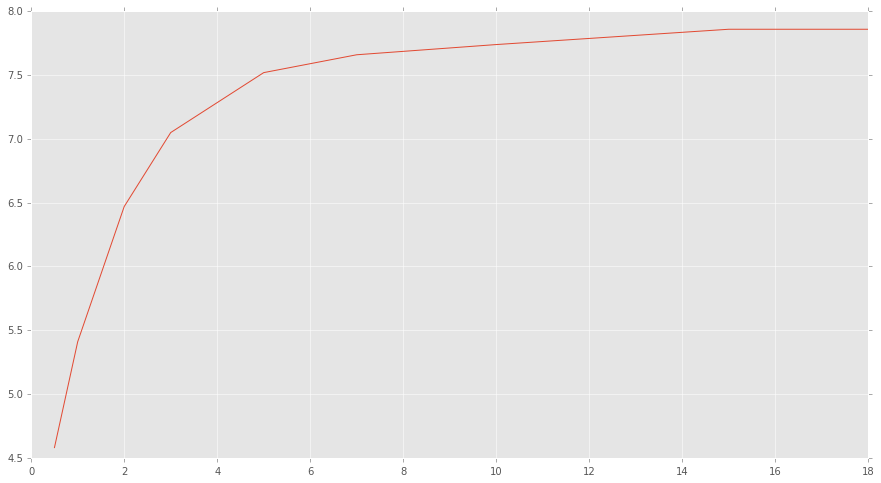

In [1064]:
plt.plot(rates.T['2011-01-11'])

In [869]:
diff_rates = rates.iloc[:, 1:].diff()[1:]
diff_rates.tail()

,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,...,13.50,14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50,18.00
Dates,,,,,,,,,,,,,,,,,,,,,
2011-12-30,-0.08,-0.055,-0.03,-0.035,-0.04,-0.0575,-0.075,-0.0925,-0.11,-0.1200,...,-0.126,-0.124,-0.122,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12
2012-01-03,0.01,0.015,0.02,0.030,0.04,0.0550,0.070,0.0850,0.10,0.1075,...,0.109,0.106,0.103,0.10,0.10,0.10,0.10,0.10,0.10,0.10
2012-01-04,-0.02,-0.035,-0.05,-0.045,-0.04,-0.0375,-0.035,-0.0325,-0.03,-0.0275,...,-0.003,-0.002,-0.001,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2012-01-05,0.02,0.030,0.04,0.040,0.04,0.0400,0.040,0.0400,0.04,0.0400,...,0.033,0.032,0.031,0.03,0.03,0.03,0.03,0.03,0.03,0.03
2012-01-06,0.01,0.005,0.00,0.000,0.00,0.0000,0.000,0.0000,0.00,0.0000,...,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [892]:
diff_rates_history = diff_rates[diff_rates.index <= today_date] # исторические

In [893]:
diff_rates_history.tail() # приращения - аналог таблицы доходностей для акций!!

,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,...,13.50,14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50,18.00
Dates,,,,,,,,,,,,,,,,,,,,,
2010-12-29,-0.06,-0.050,-0.04,-0.020,0.00,0.0025,5.000000e-03,0.0075,0.01,-0.0050,...,-0.199,-0.206,-0.213,-0.22,-0.22,-0.22,-0.22,-0.22,-0.22,-0.22
2010-12-30,0.17,0.160,0.15,0.130,0.11,0.0925,7.500000e-02,0.0575,0.04,0.0300,...,0.024,0.026,0.028,0.03,0.03,0.03,0.03,0.03,0.03,0.03
2011-01-11,0.08,0.095,0.11,0.100,0.09,0.0750,6.000000e-02,0.0450,0.03,0.0200,...,-0.094,-0.096,-0.098,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10
2011-01-12,-0.13,-0.135,-0.14,-0.130,-0.12,-0.1025,-8.500000e-02,-0.0675,-0.05,-0.0425,...,0.007,0.008,0.009,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2011-01-13,-0.04,-0.045,-0.05,-0.035,-0.02,-0.0100,1.776357e-15,0.0100,0.02,0.0275,...,0.053,0.052,0.051,0.05,0.05,0.05,0.05,0.05,0.05,0.05


cov матрицы неразумно считать, корреляции большие.    
опишем одним числом каждую дату - max increment. завысим риск - возьмем макс. для каждого срока
дюрация - чувств к паралл сдвигу кривой!

In [1050]:
max_increments_history = diff_rates_history.max(axis=1)
max_increments_history.tail()

Dates
2010-12-29    0.01
2010-12-30    0.17
2011-01-11    0.11
2011-01-12    0.01
2011-01-13    0.06
dtype: float64

In [895]:
max_increments_all = diff_rates_all.max(axis=1)
max_increments_all.tail()

Dates
2011-12-30   -0.03
2012-01-03    0.13
2012-01-04    0.00
2012-01-05    0.04
2012-01-06    0.01
dtype: float64

In [896]:
np.mean(max_increments_history)

0.10134538152610445

In [877]:
np.std(max_increments_history)

0.22593668744959883

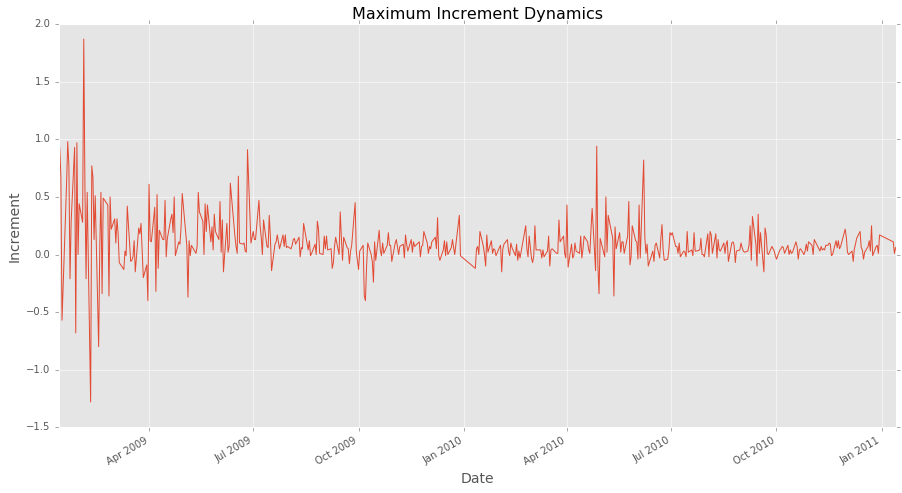

In [878]:
max_increments_history.plot()
plt.title('Maximum Increment Dynamics', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Increment', fontsize=14)

а какое распределение имеют макс приращения?
вряд ли норм

Gumbel! но это иллюстрация:) можно юзать неадкеватное нормальное.

параметры распред - норм

(array([0.01593676, 0.        , 0.        , 0.01593676, 0.01593676,
        0.01593676, 0.03187353, 0.11155734, 0.14343087, 1.00401606,
        3.697329  , 1.68929687, 0.49403965, 0.25498821, 0.19124116,
        0.09562058, 0.04781029, 0.09562058, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01593676]),
 array([-1.28 , -1.154, -1.028, -0.902, -0.776, -0.65 , -0.524, -0.398,
        -0.272, -0.146, -0.02 ,  0.106,  0.232,  0.358,  0.484,  0.61 ,
         0.736,  0.862,  0.988,  1.114,  1.24 ,  1.366,  1.492,  1.618,
         1.744,  1.87 ]),
 <a list of 25 Patch objects>)

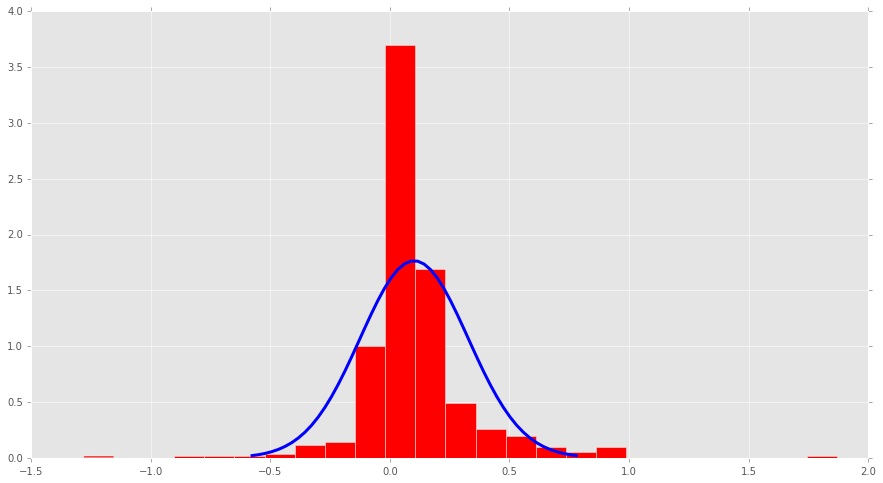

In [879]:
x_norm = np.linspace(np.mean(max_increments_history)-3*np.std(max_increments_history),
                    np.mean(max_increments_history)+3*np.std(max_increments_history))

plt.plot(x_norm, mlab.normpdf(x_norm, np.mean(max_increments_history),
                        np.std(max_increments_history)), lw=3, color='blue')

plt.hist(max_increments, normed=True, bins=25, color='red') 

In [880]:
stats.skew(max_increments_history)

1.273040108309973

Note that the skewness is higher than 0 in this example, suggesting non-normality.

In [881]:
stats.kurtosis(max_increments_history)

12.563430089199967

Kurtosis of normal is 3.

In [882]:
p_value = stats.shapiro(max_increments_history)[1]
if p_value <= 0.01:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hypothesis of normality is accepted.")

Null hypothesis of normality is rejected.


умножаем квантиль на дюрацию, получаем VaR на день в процентах от стоимости портфеля!!!    

берем сегодняшнюю дюрацию, прогнозируем VaR на завтра.

In [883]:
alpha = 0.01
z_crit = stats.norm.ppf(1-alpha)
z_crit

2.3263478740408408

In [885]:
first_quantile = np.mean(max_increments_history) + np.std(max_increments_history)*z_crit
first_quantile

0.6269527140423086

## Bonds

In [778]:
first_discount_rates

,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,...,13.50,14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50,18.00
Dates,,,,,,,,,,,,,,,,,,,,,
2011-01-13,4.48,5.24,5.76,6.28,6.595,6.91,7.055,7.2,7.345,7.49,...,7.884,7.896,7.908,7.92,7.92,7.92,7.92,7.92,7.92,7.92


In [742]:
rates.columns

Index(['0.50', '1.00', '1.50', '2.00', '2.50', '3.00', '3.50', '4.00', '4.50',
       '5.00', '5.50', '6.00', '6.50', '7.00', '7.50', '8.00', '8.50', '9.00',
       '9.50', '10.00', '10.50', '11.00', '11.50', '12.00', '12.50', '13.00',
       '13.50', '14.00', '14.50', '15.00', '15.50', '16.00', '16.50', '17.00',
       '17.50', '18.00'],
      dtype='object')

In [744]:
s_arr = np.arange(0.5, 18.5, 0.5).reshape(1, 36) # payment periods
s_arr.shape

(1, 36)

In [745]:
s_arr

array([[ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
         6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
        11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
        17. , 17.5, 18. ]])

In [779]:
first_discount_factors = np.exp(-(np.array(first_discount_rates)/100)*s_arr) # дисконты для первого расчета
first_discount_factors

array([[0.97784902, 0.94894921, 0.91722727, 0.88196756, 0.8479997 ,
        0.81277578, 0.78119928, 0.74976159, 0.7185464 , 0.68763301,
        0.66053841, 0.63419424, 0.60859637, 0.58373977, 0.56094916,
        0.53894954, 0.51771779, 0.49723128, 0.47746791, 0.45840601,
        0.44031716, 0.42289135, 0.40610643, 0.38994094, 0.37437399,
        0.35938537, 0.34495545, 0.33106518, 0.3176961 , 0.30483032,
        0.29299492, 0.28161905, 0.27068486, 0.26017521, 0.2500736 ,
        0.2403642 ]])

In [897]:
# датафрейм с будущими дисконт-факторами

discount_factors_today_future_unclean = pd.DataFrame(np.exp(-(np.array(rates_today_future)/100)*s_arr))
discount_factors_today_future = discount_factors_today_future_unclean.set_index(rates_today_future.index, 'Dates')

discount_factors_today_future.columns = rates_today_future.columns
discount_factors_today_future.head()

,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,...,13.50,14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50,18.00
Dates,,,,,,,,,,,,,,,,,,,,,
2011-01-13,0.977849,0.948949,0.917227,0.881968,0.848000,0.812776,0.781199,0.749762,0.718546,0.687633,...,0.344955,0.331065,0.317696,0.304830,0.292995,0.281619,0.270685,0.260175,0.250074,0.240364
2011-01-14,0.977360,0.947337,0.914617,0.878271,0.843876,0.808399,0.776837,0.745575,0.714677,0.684203,...,0.344676,0.330880,0.317604,0.304830,0.292995,0.281619,0.270685,0.260175,0.250074,0.240364
2011-01-17,0.978240,0.949139,0.917021,0.881086,0.846834,0.811314,0.779560,0.747964,0.716609,0.685573,...,0.344211,0.330417,0.317144,0.304373,0.292541,0.281169,0.270239,0.259733,0.249636,0.239932
2011-01-18,0.978436,0.949709,0.917984,0.882497,0.848530,0.813264,0.781678,0.750212,0.718951,0.687977,...,0.344490,0.330602,0.317236,0.304373,0.292541,0.281169,0.270239,0.259733,0.249636,0.239932
2011-01-19,0.978436,0.949804,0.918191,0.882850,0.848848,0.813508,0.781815,0.750212,0.718789,0.687633,...,0.343422,0.329585,0.316271,0.303462,0.291636,0.280271,0.269348,0.258852,0.248764,0.239070


### Функции для выполнения расчетов по облигациям (перепроверить, особенно CF)

In [533]:
def bond_cash_flows(face_value, coupon_rate_yearly, n_payments_per_year, n_years, bond_type):
    
    coup_rate_yearly_percent = coupon_rate_yearly/100
    coup_rate = coup_rate_yearly_percent/n_payments_per_year
    n_payment_periods = n_payments_per_year*n_years
    
    if bond_type == 'plain vanilla':
        cash_flows = [coup_rate*face_value]*(n_payment_periods-1)
        cash_flows.append(coup_rate*face_value + face_value)
        cash_flows = np.array(cash_flows).reshape(1, len(cash_flows))
        return cash_flows
    
    
    elif bond_type == 'amortized':
        face_flows = np.array([face_value/n_payment_periods]*n_payment_periods)
        face_left = face_value - np.array([0] + list(np.cumsum(face_flows)[:-1]))
        coupon_flows = coup_rate*face_left
        cash_flows = face_flows + coupon_flows
        return cash_flows.reshape(1, len(cash_flows))
    
    else:
        return 'Error! Iappropriate bond type.'
    
#############################################################################

def bond_dcf(face_value, coupon_rate_yearly, n_payments_per_year, n_years, bond_type, discount_factors):
    cash_flows = bond_cash_flows(face_value, coupon_rate_yearly, n_payments_per_year, n_years, bond_type)
    
    return discount_factors[:, :len(cash_flows)]*cash_flows
   
#############################################################################    
    
def bond_price(face_value, coupon_rate_yearly, n_payments_per_year, n_years, bond_type, discount_factors):
    discounted_cf = bond_dcf(face_value, coupon_rate_yearly, n_payments_per_year, n_years, bond_type, discount_factors)
    return np.sum(discounted_cf)

#############################################################################

def fisher_weil_duration(face_value, coupon_rate_yearly, n_payments_per_year, n_years, bond_type, discount_factors):
    
    payment_periods = np.arange(1/n_payments_per_year, n_years + 1/n_payments_per_year,
                  1/n_payments_per_year).reshape(1, n_years*n_payments_per_year) 
    
    discounted_cf = bond_dcf(face_value, coupon_rate_yearly, n_payments_per_year, n_years, bond_type, discount_factors)
    b_price = bond_price(face_value, coupon_rate_yearly, n_payments_per_year, n_years, bond_type, discount_factors)
    
    return np.sum(discounted_cf*payment_periods)/b_price

In [534]:
trial_cf = bond_cash_flows(100, 5, 2, 5, 'amortized')
trial_cf 

array([[12.5 , 12.25, 12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 ,
        10.25]])

In [780]:
trial_dcf = bond_dcf(100, 5, 2, 5, 'amortized', first_discount_factors)
trial_dcf 

array([[12.22311272, 11.97865046, 11.73418821, 11.48972595, 11.2452637 ,
        11.00080144, 10.75633919, 10.51187693, 10.26741468, 10.02295243]])

In [781]:
trial_price = bond_price(100, 5, 2, 5, 'amortized', first_discount_factors)
trial_price 

111.23032570717965

In [782]:
fisher_weil_duration(100, 5, 2, 5, 'amortized', first_discount_factors)

2.659340659340659

In [523]:
#bond_cash_flows({'face_value':100, 'coupon_rate_yearly':0.05, 'n_payments_per_year':2, 'n_years':5,
#                'bond_type': 'amortized'})

### Bond porfolio analysis

In [522]:
bond1_params = {'face_value':100, 'coupon_rate_yearly':4.84, 'n_payments_per_year':2, 'n_years': 2,
               'bond_type':'plain vanilla'}
bond2_params = {'face_value':100, 'coupon_rate_yearly':6.14, 'n_payments_per_year':2, 'n_years': 3,
               'bond_type':'plain vanilla'}
bond3_params = {'face_value':100, 'coupon_rate_yearly':5.7, 'n_payments_per_year':2, 'n_years': 6,
               'bond_type':'plain vanilla'}
bond4_params = {'face_value':100, 'coupon_rate_yearly':4.34, 'n_payments_per_year':2, 'n_years': 10,
               'bond_type':'amortized'}
bond5_params = {'face_value':100, 'coupon_rate_yearly':2.28, 'n_payments_per_year':1, 'n_years': 13,
               'bond_type':'amortized'}
bond6_params = {'face_value':100, 'coupon_rate_yearly':4.73, 'n_payments_per_year':1, 'n_years': 18,
               'bond_type':'amortized'}

In [536]:
bond1_cf = \
bond_cash_flows(face_value=bond1_params['face_value'], coupon_rate_yearly=bond1_params['coupon_rate_yearly'],
               n_payments_per_year=bond1_params['n_payments_per_year'], n_years=bond1_params['n_years'],
               bond_type=bond1_params['bond_type'])
bond1_cf

array([[  2.42,   2.42,   2.42, 102.42]])

In [538]:
bond2_cf = \
bond_cash_flows(face_value=bond2_params['face_value'], coupon_rate_yearly=bond2_params['coupon_rate_yearly'],
               n_payments_per_year=bond2_params['n_payments_per_year'], n_years=bond2_params['n_years'],
               bond_type=bond2_params['bond_type'])
bond2_cf

array([[  3.07,   3.07,   3.07,   3.07,   3.07, 103.07]])

In [539]:
bond3_cf = \
bond_cash_flows(face_value=bond3_params['face_value'], coupon_rate_yearly=bond3_params['coupon_rate_yearly'],
               n_payments_per_year=bond3_params['n_payments_per_year'], n_years=bond3_params['n_years'],
               bond_type=bond3_params['bond_type'])
bond3_cf

array([[  2.85,   2.85,   2.85,   2.85,   2.85,   2.85,   2.85,   2.85,
          2.85,   2.85,   2.85, 102.85]])

In [540]:
bond4_cf = \
bond_cash_flows(face_value=bond4_params['face_value'], coupon_rate_yearly=bond4_params['coupon_rate_yearly'],
               n_payments_per_year=bond4_params['n_payments_per_year'], n_years=bond4_params['n_years'],
               bond_type=bond4_params['bond_type'])
bond4_cf

array([[7.17  , 7.0615, 6.953 , 6.8445, 6.736 , 6.6275, 6.519 , 6.4105,
        6.302 , 6.1935, 6.085 , 5.9765, 5.868 , 5.7595, 5.651 , 5.5425,
        5.434 , 5.3255, 5.217 , 5.1085]])

In [544]:
bond5_cf = \
bond_cash_flows(face_value=bond5_params['face_value'], coupon_rate_yearly=bond5_params['coupon_rate_yearly'],
               n_payments_per_year=bond5_params['n_payments_per_year'], n_years=bond5_params['n_years'],
               bond_type=bond5_params['bond_type'])
bond5_cf

array([[9.97230769, 9.79692308, 9.62153846, 9.44615385, 9.27076923,
        9.09538462, 8.92      , 8.74461538, 8.56923077, 8.39384615,
        8.21846154, 8.04307692, 7.86769231]])

In [545]:
bond6_cf = \
bond_cash_flows(face_value=bond6_params['face_value'], coupon_rate_yearly=bond6_params['coupon_rate_yearly'],
               n_payments_per_year=bond6_params['n_payments_per_year'], n_years=bond6_params['n_years'],
               bond_type=bond6_params['bond_type'])
bond6_cf

array([[10.28555556, 10.02277778,  9.76      ,  9.49722222,  9.23444444,
         8.97166667,  8.70888889,  8.44611111,  8.18333333,  7.92055556,
         7.65777778,  7.395     ,  7.13222222,  6.86944444,  6.60666667,
         6.34388889,  6.08111111,  5.81833333]])

In [576]:
bond1_cf_clear = np.append(bond1_cf, np.zeros((1, 18*2-bond1_cf.shape[1])))
bond2_cf_clear = np.append(bond2_cf, np.zeros((1, 18*2-bond2_cf.shape[1])))
bond3_cf_clear = np.append(bond3_cf, np.zeros((1, 18*2-bond3_cf.shape[1])))
bond4_cf_clear = np.append(bond4_cf, np.zeros((1, 18*2-bond4_cf.shape[1])))

bond4_cf_clear

array([7.17  , 7.0615, 6.953 , 6.8445, 6.736 , 6.6275, 6.519 , 6.4105,
       6.302 , 6.1935, 6.085 , 5.9765, 5.868 , 5.7595, 5.651 , 5.5425,
       5.434 , 5.3255, 5.217 , 5.1085, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    ])

In [636]:
bond4_cf_clear.shape

(36,)

In [637]:
bond5_cf.shape

(1, 13)

In [652]:
bond5_cf_ok = []
bond6_cf_clear = []

for i in range(bond5_cf.shape[1]):
    bond5_cf_ok.append(0)
    bond5_cf_ok.extend(bond5_cf[:, i])
bond5_cf_ok = np.array(bond5_cf_ok).reshape(bond5_cf.shape[1]*2,)
bond5_cf_ok

for j in range(bond6_cf.shape[1]):
    bond6_cf_clear.append(0)
    bond6_cf_clear.extend(bond6_cf[:, j])   
bond6_cf_clear = np.array(bond6_cf_clear).reshape(bond6_cf.shape[1]*2,)
bond6_cf_clear

array([ 0.        , 10.28555556,  0.        , 10.02277778,  0.        ,
        9.76      ,  0.        ,  9.49722222,  0.        ,  9.23444444,
        0.        ,  8.97166667,  0.        ,  8.70888889,  0.        ,
        8.44611111,  0.        ,  8.18333333,  0.        ,  7.92055556,
        0.        ,  7.65777778,  0.        ,  7.395     ,  0.        ,
        7.13222222,  0.        ,  6.86944444,  0.        ,  6.60666667,
        0.        ,  6.34388889,  0.        ,  6.08111111,  0.        ,
        5.81833333])

In [653]:
bond5_cf_ok.shape

(26,)

In [654]:
bond6_cf_clear.shape

(36,)

In [655]:
bond5_cf_clear = np.append(bond5_cf_ok, np.zeros((18*2-bond5_cf_ok.shape[0],)))

In [656]:
bond5_cf_clear.shape

(36,)

In [657]:
bond6_cf_clear.shape

(36,)

In [660]:
bond_portfolio_cf = \
bond1_cf_clear + bond2_cf_clear + bond3_cf_clear + bond4_cf_clear + bond5_cf_clear + bond6_cf_clear

bond_portfolio_cf # ДЕНЕЖНЫЕ ПОТОКИ ПО ПОРТФЕЛЮ

array([ 15.51      ,  35.65936325,  15.293     , 135.00420085,
        12.656     , 131.92903846,   9.369     ,  28.20387607,
         9.152     ,  27.54871368,   8.935     , 126.89355128,
         5.868     ,  23.38838889,   5.651     ,  22.7332265 ,
         5.434     ,  22.0780641 ,   5.217     ,  21.42290171,
         0.        ,  15.87623932,   0.        ,  15.43807692,
         0.        ,  14.99991453,   0.        ,   6.86944444,
         0.        ,   6.60666667,   0.        ,   6.34388889,
         0.        ,   6.08111111,   0.        ,   5.81833333])

In [662]:
bond_portfolio_cf.shape

(36,)

In [661]:
bond6_cf # check the last payment

array([[10.28555556, 10.02277778,  9.76      ,  9.49722222,  9.23444444,
         8.97166667,  8.70888889,  8.44611111,  8.18333333,  7.92055556,
         7.65777778,  7.395     ,  7.13222222,  6.86944444,  6.60666667,
         6.34388889,  6.08111111,  5.81833333]])

In [784]:
bond_portfolio_dcf = first_discount_factors[:, :len(bond_portfolio_cf)]*bond_portfolio_cf 
bond_portfolio_dcf

array([[ 15.16643826,  33.83892463,  14.02715659, 119.06932606,
         10.73228417, 107.22872723,   7.31905607,  21.14618303,
          6.57613663,  18.94340489,   5.90191072,  80.47515925,
          3.57124352,  13.65273268,   3.16992371,  12.25206193,
          2.81327845,  10.97790417,   2.49095007,   9.82038692,
          0.        ,   6.7139242 ,   0.        ,   6.01993815,
          0.        ,   5.3907499 ,   0.        ,   2.27423387,
          0.        ,   2.01391228,   0.        ,   1.78655998,
          0.        ,   1.58215435,   0.        ,   1.39851905]])

In [785]:
bond_portfolio_price = np.sum(bond_portfolio_dcf)
bond_portfolio_price

526.3531807354663

In [786]:
s_arr

array([[ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
         6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
        11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
        17. , 17.5, 18. ]])

In [787]:
bond_portfolio_duration = np.sum(bond_portfolio_dcf*s_arr)/bond_portfolio_price
bond_portfolio_duration

4.2613422481537615

In [788]:
n_days = 10

In [886]:
first_quantile

0.6269527140423086

In [1118]:
VaR_1day = bond_portfolio_duration*first_quantile/100
-VaR_1day

-0.026716600879431535

In [888]:
VaR_10days = bond_portfolio_duration*first_quantile*np.sqrt(n_days)/100
VaR_10days

0.08448531011666122

In [1057]:
max_increments_all[:5]

Dates
2009-01-12    0.70
2009-01-13    0.93
2009-01-14    0.68
2009-01-15   -0.57
2009-01-16   -0.27
dtype: float64

### FOR ALL FUTURE DATA

In [1055]:
bond_portfolio_cf

array([ 15.51      ,  35.65936325,  15.293     , 135.00420085,
        12.656     , 131.92903846,   9.369     ,  28.20387607,
         9.152     ,  27.54871368,   8.935     , 126.89355128,
         5.868     ,  23.38838889,   5.651     ,  22.7332265 ,
         5.434     ,  22.0780641 ,   5.217     ,  21.42290171,
         0.        ,  15.87623932,   0.        ,  15.43807692,
         0.        ,  14.99991453,   0.        ,   6.86944444,
         0.        ,   6.60666667,   0.        ,   6.34388889,
         0.        ,   6.08111111,   0.        ,   5.81833333])

In [1054]:
discount_factors_today_future.head()

,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,...,13.50,14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50,18.00
Dates,,,,,,,,,,,,,,,,,,,,,
2011-01-13,0.977849,0.948949,0.917227,0.881968,0.848000,0.812776,0.781199,0.749762,0.718546,0.687633,...,0.344955,0.331065,0.317696,0.304830,0.292995,0.281619,0.270685,0.260175,0.250074,0.240364
2011-01-14,0.977360,0.947337,0.914617,0.878271,0.843876,0.808399,0.776837,0.745575,0.714677,0.684203,...,0.344676,0.330880,0.317604,0.304830,0.292995,0.281619,0.270685,0.260175,0.250074,0.240364
2011-01-17,0.978240,0.949139,0.917021,0.881086,0.846834,0.811314,0.779560,0.747964,0.716609,0.685573,...,0.344211,0.330417,0.317144,0.304373,0.292541,0.281169,0.270239,0.259733,0.249636,0.239932
2011-01-18,0.978436,0.949709,0.917984,0.882497,0.848530,0.813264,0.781678,0.750212,0.718951,0.687977,...,0.344490,0.330602,0.317236,0.304373,0.292541,0.281169,0.270239,0.259733,0.249636,0.239932
2011-01-19,0.978436,0.949804,0.918191,0.882850,0.848848,0.813508,0.781815,0.750212,0.718789,0.687633,...,0.343422,0.329585,0.316271,0.303462,0.291636,0.280271,0.269348,0.258852,0.248764,0.239070


In [898]:
dcf_today_future = bond_portfolio_cf*discount_factors_today_future
dcf_today_future.head() # здесь дата - дата прогноза: поменяем и уберем последнюю (для нее нет данных)

,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,...,13.50,14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50,18.00
Dates,,,,,,,,,,,,,,,,,,,,,
2011-01-13,15.166438,33.838925,14.027157,119.069326,10.732284,107.228727,7.319056,21.146183,6.576137,18.943405,...,0.0,2.274234,0.0,2.013912,0.0,1.786560,0.0,1.582154,0.0,1.398519
2011-01-14,15.158857,33.781447,13.987236,118.570284,10.680092,106.651253,7.278184,21.028095,6.540721,18.848924,...,0.0,2.272961,0.0,2.013912,0.0,1.786560,0.0,1.582154,0.0,1.398519
2011-01-17,15.172506,33.845693,14.024001,118.950316,10.717537,107.035889,7.303702,21.095493,6.558405,18.886660,...,0.0,2.269781,0.0,2.010894,0.0,1.783704,0.0,1.579467,0.0,1.396004
2011-01-18,15.175541,33.866007,14.038734,119.140789,10.738994,107.293084,7.323540,21.158875,6.579837,18.952879,...,0.0,2.271052,0.0,2.010894,0.0,1.783704,0.0,1.579467,0.0,1.396004
2011-01-19,15.175541,33.869393,14.041893,119.188455,10.743022,107.325277,7.324822,21.158875,6.578356,18.943405,...,0.0,2.264068,0.0,2.004870,0.0,1.778005,0.0,1.574106,0.0,1.390987


In [932]:
dcf_today_future = dcf_today_future[:-1]
dcf_today_future.index = rates_future.index

In [934]:
dcf_today_future.head() # теперь здесь спрогнозированные на дату DCF

,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,...,13.50,14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50,18.00
Dates,,,,,,,,,,,,,,,,,,,,,
2011-01-14,15.166438,33.838925,14.027157,119.069326,10.732284,107.228727,7.319056,21.146183,6.576137,18.943405,...,0.0,2.274234,0.0,2.013912,0.0,1.786560,0.0,1.582154,0.0,1.398519
2011-01-17,15.158857,33.781447,13.987236,118.570284,10.680092,106.651253,7.278184,21.028095,6.540721,18.848924,...,0.0,2.272961,0.0,2.013912,0.0,1.786560,0.0,1.582154,0.0,1.398519
2011-01-18,15.172506,33.845693,14.024001,118.950316,10.717537,107.035889,7.303702,21.095493,6.558405,18.886660,...,0.0,2.269781,0.0,2.010894,0.0,1.783704,0.0,1.579467,0.0,1.396004
2011-01-19,15.175541,33.866007,14.038734,119.140789,10.738994,107.293084,7.323540,21.158875,6.579837,18.952879,...,0.0,2.271052,0.0,2.010894,0.0,1.783704,0.0,1.579467,0.0,1.396004
2011-01-20,15.175541,33.869393,14.041893,119.188455,10.743022,107.325277,7.324822,21.158875,6.578356,18.943405,...,0.0,2.264068,0.0,2.004870,0.0,1.778005,0.0,1.574106,0.0,1.390987


In [936]:
dcf_today_future.tail()

,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,...,13.50,14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50,18.00
Dates,,,,,,,,,,,,,,,,,,,,,
2011-12-30,15.043334,33.398526,13.789331,116.781643,10.493504,104.591699,7.111363,20.467933,6.341466,18.200623,...,0.0,2.063664,0.0,1.821352,0.0,1.604949,0.0,1.411831,0.0,1.239631
2012-01-03,15.053868,33.425255,13.800712,116.851733,10.502690,104.717285,7.125689,20.529429,6.367917,18.301003,...,0.0,2.099802,0.0,1.854433,0.0,1.636062,0.0,1.440928,0.0,1.266698
2012-01-04,15.051610,33.421913,13.797607,116.805002,10.494816,104.591699,7.111985,20.472027,6.343606,18.209726,...,0.0,2.068871,0.0,1.826825,0.0,1.610093,0.0,1.416639,0.0,1.244102
2012-01-05,15.051610,33.428598,13.804853,116.921865,10.506629,104.717285,7.121325,20.500708,6.352891,18.237061,...,0.0,2.069451,0.0,1.826825,0.0,1.610093,0.0,1.416639,0.0,1.244102
2012-01-06,15.050105,33.421913,13.798642,116.828365,10.496128,104.591699,7.111363,20.467933,6.341466,18.200623,...,0.0,2.060200,0.0,1.818622,0.0,1.602383,0.0,1.409433,0.0,1.237402


In [937]:
bond_prices_today_future = dcf_today_future.sum(axis=1)
bond_prices_today_future.head()

Dates
2011-01-14    526.353181
2011-01-17    524.238140
2011-01-18    525.401947
2011-01-19    526.541890
2011-01-20    526.341468
dtype: float64

In [938]:
dcf_today_future.shape

(249, 36)

In [939]:
s_arr.T.shape

(36, 1)

In [941]:
durations_today_future = dcf_today_future@s_arr.T*(((bond_prices_today_future)**(-1)).values.reshape(249, -1)) # все будущие дюрации!!!
durations_today_future[:5]

array([[4.26134225],
       [4.2627238 ],
       [4.25907483],
       [4.25980272],
       [4.25676436]])

In [942]:
min_obs = len(max_increments_all[max_increments_all.index <= today_date]) # чтобы начать с даты старта

In [946]:
max_increment_today_future_means = max_increments_all.expanding(min_obs).mean().dropna()[:-1]
max_increment_today_future_means.index = rates_future.index # дата - дата прогнозирования бонда
max_increment_today_future_means[:5]

Dates
2011-01-14    0.101345
2011-01-17    0.101563
2011-01-18    0.101380
2011-01-19    0.101178
2011-01-20    0.101036
dtype: float64

In [949]:
max_increment_today_future_stds = max_increments_all.expanding(min_obs).std().dropna()[:-1]
max_increment_today_future_stds.index = rates_future.index
max_increment_today_future_stds[:5]

Dates
2011-01-14    0.226164
2011-01-17    0.225989
2011-01-18    0.225800
2011-01-19    0.225619
2011-01-20    0.225416
dtype: float64

In [950]:
quantiles_today_future = max_increment_today_future_means + max_increment_today_future_stds*z_crit
quantiles_today_future[:5]

Dates
2011-01-14    0.627481
2011-01-17    0.627292
2011-01-18    0.626668
2011-01-19    0.626046
2011-01-20    0.625433
dtype: float64

In [919]:
future_dates = bond_prices_future.index
future_dates

DatetimeIndex(['2011-01-14', '2011-01-17', '2011-01-18', '2011-01-19',
               '2011-01-20', '2011-01-21', '2011-01-24', '2011-01-25',
               '2011-01-26', '2011-01-27',
               ...
               '2011-12-23', '2011-12-26', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06'],
              dtype='datetime64[ns]', name='Dates', length=249, freq=None)

In [951]:
max_increment_today_future_means.shape

(249,)

In [952]:
quantiles_today_future.shape

(249,)

In [953]:
durations_today_future.shape

(249, 1)

In [989]:
VaRs_1day = -durations_today_future.reshape(249,)*quantiles_today_future/100
VaRs_1day[:5]

Dates
2011-01-14   -0.026739
2011-01-17   -0.026740
2011-01-18   -0.026690
2011-01-19   -0.026668
2011-01-20   -0.026623
dtype: float64

In [991]:
VaRs_10day = VaRs_1day[:(len(VaRs_1day)-10)]*np.sqrt(10)
VaRs_10day[:5]

Dates
2011-01-14   -0.084557
2011-01-17   -0.084558
2011-01-18   -0.084402
2011-01-19   -0.084333
2011-01-20   -0.084190
dtype: float64

In [992]:
VaRs_10day.shape

(239,)

In [993]:
correct_bond_price_changes = bond_prices_today_future.pct_change(periods=10).shift(-1)[:-1][9:]
correct_bond_price_changes[:5]

Dates
2011-01-27   -0.008807
2011-01-28   -0.006280
2011-01-31   -0.002439
2011-02-01   -0.008222
2011-02-02   -0.011519
dtype: float64

In [994]:
correct_bond_price_changes.shape

(239,)

In [995]:
VaRs_10day.index = correct_bond_price_changes.index
VaRs_10day[:5]

Dates
2011-01-27   -0.084557
2011-01-28   -0.084558
2011-01-31   -0.084402
2011-02-01   -0.084333
2011-02-02   -0.084190
dtype: float64

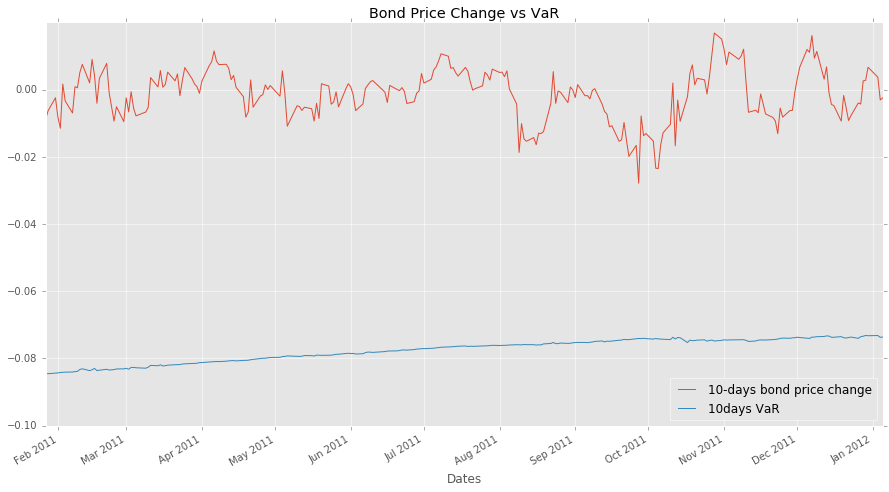

In [1024]:
correct_bond_price_changes.plot()
VaRs_10day.plot()

plt.title('Bond Price Change vs VaR')
plt.legend(['10-days bond price change', '10days VaR'], loc=4)

### ES???

In [1111]:
def delta_norm_stock_VaR_ES(start, end, p_weights, alpha, return_period, daily_log_returns = daily_log_returns):
    cov = np.array(daily_log_returns[start:end].cov())
    stdev_p = np.sqrt(p_weights@cov@p_weights)
    mu_p = (daily_log_returns@p_weights.T).mean()
    
    VaR = - mu_p + stdev_p * st.norm.ppf(1 - alpha) * np.sqrt(return_period)
    ES = - mu_p + stdev_p * st.norm.pdf(st.norm.ppf(1 - alpha))/alpha * np.sqrt(return_period)

    return VaR, ES

NameError: name 'daily_log_returns' is not defined

In [1114]:
first_quantile

0.6269527140423086

In [1115]:
first_es = np.mean(max_increments_history) + np.std(max_increments_history) * stats.norm.pdf(stats.norm.ppf(1 - alpha))/alpha

In [1119]:
-first_es*bond_portfolio_duration/100

-0.02997918421032329

In [1105]:
import scipy

In [1110]:
(-np.mean(max_increments_history) + np.std(max_increments_history)\
* scipy.stats.norm.pdf(stats.norm.ppf(1 - alpha))/alpha * np.sqrt(10))*durations_today_future[0]

array([7.6826986])

In [1006]:
(-durations_today_future.reshape(249,)*(max_increment_today_future_means + \
                                        max_increment_today_future_means * \
                                        stats.norm.pdf(stats.norm.ppf(1-alpha))/alpha)/100)[:5]

Dates
2011-01-14   -0.015829
2011-01-17   -0.015868
2011-01-18   -0.015826
2011-01-19   -0.015797
2011-01-20   -0.015764
dtype: float64

### Модельный метод

In [999]:
from sklearn.decomposition import PCA

В PCA неправильно будет использовать интерполированные ставки, так как они линейно завсимы от других и созданы искусственно.

In [1001]:
pca_rates = pd.read_csv('rates.csv', parse_dates=['Dates'])
pca_rates.head()

,Dates,0.25,0.50,0.75,1.00,2.00,3.00,5.00,7.00,10.00,15.00
0,2009-01-13,10.98,11.18,11.38,11.53,11.81,11.76,11.52,11.28,10.98,10.54
1,2009-01-11,10.17,10.39,10.63,10.83,11.30,11.27,10.82,10.35,9.88,9.43
2,2009-01-16,10.30,10.42,10.56,10.67,10.92,10.94,10.82,10.68,10.55,10.36
3,2009-01-12,10.90,11.15,11.38,11.53,11.67,11.40,10.84,10.44,10.05,9.68
4,2009-01-22,11.16,11.26,11.35,11.42,11.54,11.54,11.54,11.57,11.58,11.48


In [1007]:
pca_rates = pca_rates.sort_values(by=['Dates']) # сортируем ставки по датам
pca_rates = pca_rates.set_index('Dates')

In [1008]:
pca_rates.head()

,0.25,0.50,0.75,1.00,2.00,3.00,5.00,7.00,10.00,15.00
Dates,,,,,,,,,,
2009-01-11,10.17,10.39,10.63,10.83,11.30,11.27,10.82,10.35,9.88,9.43
2009-01-12,10.90,11.15,11.38,11.53,11.67,11.40,10.84,10.44,10.05,9.68
2009-01-13,10.98,11.18,11.38,11.53,11.81,11.76,11.52,11.28,10.98,10.54
2009-01-14,11.42,11.57,11.75,11.89,12.25,12.27,12.06,11.81,11.55,11.22
2009-01-15,10.69,10.79,10.90,10.99,11.20,11.21,11.09,10.96,10.82,10.65


In [1015]:
pca_rates_history = pca_rates[pca_rates.index < today_date]
pca_rates_history.head()

,0.25,0.50,0.75,1.00,2.00,3.00,5.00,7.00,10.00,15.00
Dates,,,,,,,,,,
2009-01-11,10.17,10.39,10.63,10.83,11.30,11.27,10.82,10.35,9.88,9.43
2009-01-12,10.90,11.15,11.38,11.53,11.67,11.40,10.84,10.44,10.05,9.68
2009-01-13,10.98,11.18,11.38,11.53,11.81,11.76,11.52,11.28,10.98,10.54
2009-01-14,11.42,11.57,11.75,11.89,12.25,12.27,12.06,11.81,11.55,11.22
2009-01-15,10.69,10.79,10.90,10.99,11.20,11.21,11.09,10.96,10.82,10.65


In [1018]:
pca_diff_rates = pca_rates.diff()[1:]
pca_diff_rates.head()

,0.25,0.50,0.75,1.00,2.00,3.00,5.00,7.00,10.00,15.00
Dates,,,,,,,,,,
2009-01-12,0.73,0.76,0.75,0.70,0.37,0.13,0.02,0.09,0.17,0.25
2009-01-13,0.08,0.03,0.00,0.00,0.14,0.36,0.68,0.84,0.93,0.86
2009-01-14,0.44,0.39,0.37,0.36,0.44,0.51,0.54,0.53,0.57,0.68
2009-01-15,-0.73,-0.78,-0.85,-0.90,-1.05,-1.06,-0.97,-0.85,-0.73,-0.57
2009-01-16,-0.39,-0.37,-0.34,-0.32,-0.28,-0.27,-0.27,-0.28,-0.27,-0.29


In [1065]:
pca_diff_rates_history = pca_diff_rates[pca_diff_rates.index <= today_date]
pca_diff_rates_history.tail()

,0.25,0.50,0.75,1.00,2.00,3.00,5.00,7.00,10.00,15.00
Dates,,,,,,,,,,
2010-12-29,-0.06,-0.06,-0.07,-0.06,-0.04,0.00,0.01,-0.05,-0.15,-0.22
2010-12-30,0.14,0.15,0.17,0.17,0.15,0.11,0.04,0.00,0.01,0.03
2011-01-11,0.00,0.04,0.07,0.08,0.11,0.09,0.03,-0.01,-0.08,-0.10
2011-01-12,-0.06,-0.09,-0.12,-0.13,-0.14,-0.12,-0.05,-0.02,0.00,0.01
2011-01-13,0.02,-0.01,-0.03,-0.04,-0.05,-0.02,0.02,0.05,0.06,0.05


In [1091]:
pca_model = PCA()


In [1092]:
pca_model.fit_transform(pca_diff_rates_history).shape

(498, 10)

In [1093]:
pca_model.explained_variance_

array([3.80373403e-01, 9.17996171e-02, 2.70855211e-02, 4.56013148e-03,
       1.56012239e-03, 1.22833674e-04, 3.74878770e-05, 2.10278746e-05,
       1.67042383e-05, 1.60442483e-05])

In [1094]:
pca_model.components_ # каждый вектор - это веса каждого инкремента в главной компоненте

array([[-0.27507938, -0.29252476, -0.306604  , -0.31767057, -0.3476744 ,
        -0.35191374, -0.34054649, -0.32505679, -0.30907036, -0.28628817],
       [-0.23791686, -0.33143025, -0.36672754, -0.36339729, -0.18865808,
         0.01482221,  0.2668072 ,  0.37140047,  0.41146596,  0.39084866],
       [ 0.41212831,  0.28583856,  0.13766925, -0.00581083, -0.41382949,
        -0.50074242, -0.29647614, -0.01887762,  0.24428712,  0.39941395],
       [-0.54004394, -0.14199208,  0.14405012,  0.2965993 ,  0.302343  ,
        -0.04770176, -0.37562343, -0.26949232,  0.10567579,  0.51077982],
       [ 0.46143204, -0.08757517, -0.29201459, -0.30528064,  0.19517306,
         0.36040825, -0.05500997, -0.41533355, -0.26026051,  0.4355365 ],
       [-0.33775037,  0.31381365,  0.22569065, -0.02244409, -0.49416715,
         0.1731045 ,  0.39791407, -0.1176531 , -0.44009977,  0.30979618],
       [ 0.16984763, -0.36197815, -0.02543561,  0.26339027,  0.1495205 ,
        -0.37456763,  0.10065539,  0.43980159

In [1095]:
pca_model_best = PCA(n_components=2)

In [1099]:
pca_model_best.fit_transform(pca_diff_rates_history)[:5]

array([[-1.23675008, -0.8267283 ],
       [-1.27114058,  1.15186089],
       [-1.54913103,  0.25504196],
       [ 2.68228228,  0.14541785],
       [ 0.93648407,  0.09445633]])

In [1100]:
pca_model_best.components_

array([[-0.27507938, -0.29252476, -0.306604  , -0.31767057, -0.3476744 ,
        -0.35191374, -0.34054649, -0.32505679, -0.30907036, -0.28628817],
       [-0.23791686, -0.33143025, -0.36672754, -0.36339729, -0.18865808,
         0.01482221,  0.2668072 ,  0.37140047,  0.41146596,  0.39084866]])

In [1080]:
pca_model.fit_transform(pca_diff_rates_history)@np.diag(pca_model.explained_variance_)

array([[-0.47042684, -0.07589334,  0.01447489],
       [-0.48350807,  0.10574039,  0.00428392],
       [-0.58924824,  0.02341275,  0.00396903],
       ...,
       [-0.0413988 , -0.01518507, -0.00369917],
       [ 0.07826515,  0.01219476,  0.00196644],
       [-0.01479818,  0.00836125,  0.001667  ]])

In [1073]:
print(pca_model.explained_variance_ratio_)

[0.75233139 0.18156825 0.0535718 ]


In [1070]:
pca_model.explained_variance_ratio_[1]

0.18156825059060305

In [1048]:
pca_components = np.arange(1, len(pca_model.explained_variance_ratio_)+1, 1)

[]

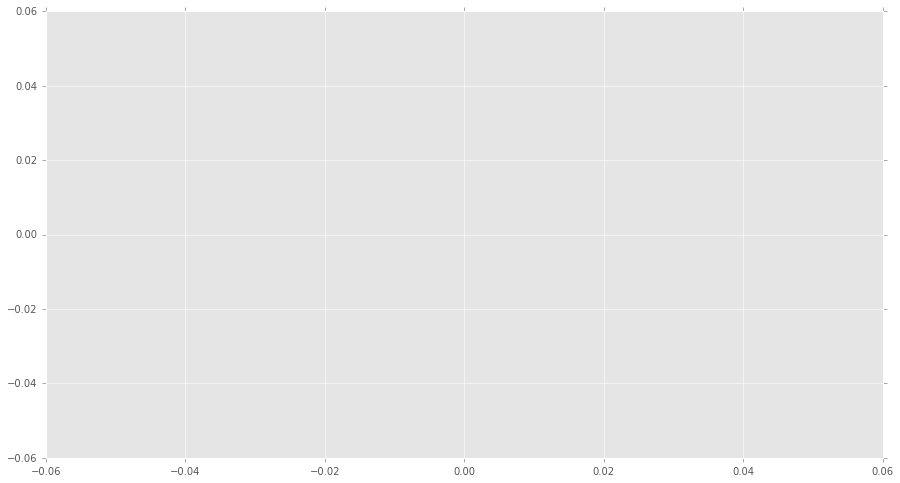

In [1049]:
plt.plot(x=pca_components, y=pca_model.explained_variance_ratio_)

In [1043]:
np.sum(pca_model.explained_variance_ratio_[])

0.009019374179824832

In [ ]:
>>> print(pca.singular_values_)  
[6.30061... 0.54980...]

### About NPV

present value of $100 received 3 years from now at a 1.0% rate

In [370]:
-np.pv(rate=0.01, nper=3, pmt=0, fv=100)

97.05901479276443

In [372]:
coup_rate

0.0242

In [373]:
discount_rates[discount_rates.columns[0]]/100

Dates
2011-01-11    0.0458
Name: 0.50, dtype: float64

In [374]:
cash_flows[0]/(1+float(discount_rates[discount_rates.columns[0]])/100)

23.14017976668579

In [375]:
-1*(np.pv(fv=cash_flows[0], rate=float(discount_rates[discount_rates.columns[0]])/100, nper=1, pmt=0))

23.14017976668579

In [376]:
cash_flows[1]/(1+float(discount_rates['0.50'])/100)**2 #???

22.126773538617126

In [377]:
-1*(np.pv(fv=cash_flows[1], rate=float(discount_rates[discount_rates.columns[1]])/100, nper=2, pmt=0)) #???

21.77969227472785

In [378]:
dcf = []

for i in range(len(cash_flows)):
    dcf.append(-1*(np.pv(fv=cash_flows[i], 
                         rate=float(discount_rates[discount_rates.columns[i]])/100,
                         nper=i+1, pmt=0)))
dcf

[23.14017976668579, 21.77969227472785, 20.353329346912577, 96.65238597883909]

In [379]:
bond_price = np.sum(dcf)
bond_price

161.9255873671653

In [380]:
dcf = []

for i in range(len(cash_flows)):
    dcf.append(-1*(np.pv(fv=cash_flows[i], 
                         rate=coup_rate,
                         nper=i+1, pmt=0)))
np.sum(dcf)

182.0939447382541

In [381]:
gov_rate = 10.39/100

In [382]:
0.0484*face_value/(1+gov_rate/2)

4.6009791339892585

In [383]:
0.0484*face_value/(1+gov_rate)

4.384455113687833

In [384]:
-np.pv(rate=gov_rate/2, nper=1, pmt=0, fv=0.0484*face_value)

4.6009791339892585

In [385]:
-np.pv(rate=gov_rate/2, nper=2, pmt=0, fv=0.0484*face_value)

4.373762188306724

In [386]:
cash_flows = np.array([24.2,  24.2,  24.2,  124.2])

In [387]:
-np.pv(nper=1, rate=10.39/2/100, pmt=0.0484*face_value)

4.600979133989252

In [388]:
-np.pv(nper=1, rate=10.39/100, pmt=0.0484*face_value)

4.384455113687838

In [389]:
cash_flows = [24.2,  24.2,  24.2,  124.2]
dcf = []
for i in range(1, len(cash_flows)+1):
    dcf.append(-np.pv(nper=1, rate=10.39/100, pmt=0.0484*face_value))

In [390]:
np.npv(rate=(10.39/100)/2, values=[24.2,  24.2,  24.2,  124.2])

175.76679877673757

In [391]:
dcf

[4.384455113687838, 4.384455113687838, 4.384455113687838, 4.384455113687838]

In [392]:
np.npv(rate=coup_rate/payments_per_year, values=cash_flows)

191.53398492081595

In [393]:
np.irr([-100, 24.2,  24.2,  24.2,  124.2])

0.24199999999999977

In [394]:
#cash_flows = []
#for n in range(T_years*payments_per_year):
     cash_flows.extend(coup_rate)#

IndentationError: unexpected indent (<ipython-input-394-cd244599383c>, line 3)